In [1]:
%load_ext autoreload
%autoreload 2

from hub.yolov5 import YOLOV5

path = "../yolov5.anec.so"
model = YOLOV5(path=path)

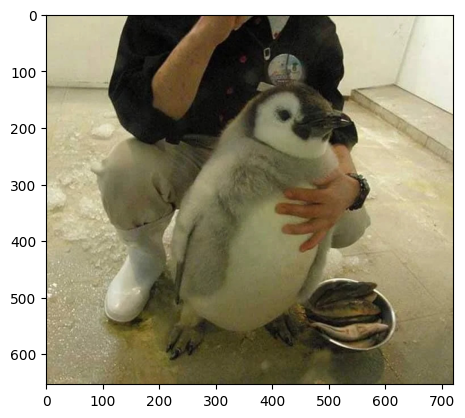

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("data/yolov5-input.jpg")[:,:,::-1]
plt.imshow(img); plt.show()

In [3]:
inarr = model.preprocess(img)
inputs = [inarr]


In [4]:
outputs = model.predict(inputs)


In [5]:
pred = model.postprocess(outputs)

In [6]:
# git clone https://github.com/ultralytics/yolov5.git
YOLOV5_REPO_PATH = "/home/eileen/lib/yolov5"
import sys; sys.path.append(YOLOV5_REPO_PATH)
from utils.general import non_max_suppression, scale_boxes

import torch
import numpy as np

t = torch.from_numpy(np.expand_dims(pred, 0))
nms = non_max_suppression(t)[0].numpy()
nms

/usr/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


array([[     164.75,      86.875,      452.75,       536.5,     0.33984,          16]], dtype=float32)

In [7]:
out = scale_boxes((576, 576, 3), nms.copy(), img.shape)
out

array([[     205.94,      75.594,      565.94,      637.62,     0.33984,          16]], dtype=float32)

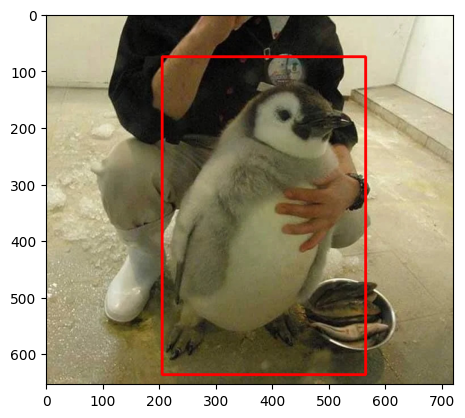

In [8]:
canvas = img.copy()

for box in out:
    x1, y1, x2, y2, conf, cls = box
    cv2.rectangle(canvas, (int(x1), int(y1)), (int(x2), int(y2)), (255,0,0), 4)

plt.imshow(canvas); plt.show()

In [9]:
#cv2.imwrite("res/yolov5.jpg", canvas[:,:,::-1])